In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("laptop_price.csv",encoding='latin-1')

In [3]:
data.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [7]:
data['Product'].unique

<bound method Series.unique of 0                               MacBook Pro
1                               Macbook Air
2                                    250 G6
3                               MacBook Pro
4                               MacBook Pro
                       ...                 
1298                         Yoga 500-14ISK
1299                         Yoga 900-13ISK
1300                     IdeaPad 100S-14IBR
1301    15-AC110nv (i7-6500U/6GB/1TB/Radeon
1302    X553SA-XX031T (N3050/4GB/500GB/W10)
Name: Product, Length: 1303, dtype: object>

In [8]:
data.drop('Product',axis=1,inplace=True)

In [9]:
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [10]:
data['ScreenResolution']=data['ScreenResolution'].str.split(" ").str[-1]
data['screen_width'],data['screen_height']=data['ScreenResolution'].str.split('x').str
data['screen_width'],data['screen_height']=data['screen_width'].astype(int),data['screen_height'].astype(int)
data.drop('ScreenResolution',axis=1,inplace=True)

/tmp/ipykernel_32075/2672964109.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['screen_width'],data['screen_height']=data['ScreenResolution'].str.split('x').str


In [11]:
data.head()

,laptop_ID,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,screen_width,screen_height
0,1,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600
1,2,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900
2,3,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080
3,4,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800
4,5,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600


In [12]:
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [13]:
data['Cpu']=data['Cpu'].str.split(" ")
data['Cpu_company']=data['Cpu'].str[0]
data['Cpu_speed_GHZ']=data['Cpu'].str[-1]
data.drop('Cpu',axis=1,inplace=True)

In [14]:
data['Cpu_speed_GHZ']=data['Cpu_speed_GHZ'].str.replace('GHz','')
data['Cpu_speed_GHZ']=pd.to_numeric(data['Cpu_speed_GHZ'])

In [15]:
data['Ram_GB']=data['Ram'].str.replace('GB','').astype(float)
data.drop('Ram',axis=1,inplace=True)

In [16]:
data['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [17]:
data['Memory_size_GB']=data['Memory'].str.split(' ').str[0]

In [18]:
data['Memory_size_GB']=data['Memory_size_GB'].str.replace('GB','')

In [19]:
data['Memory_type']=data['Memory'].str.split(' ').str[1:]

In [20]:
data.drop('Memory',axis=1,inplace=True)

In [21]:
data.head()

,laptop_ID,Company,TypeName,Inches,Gpu,OpSys,Weight,Price_euros,screen_width,screen_height,Cpu_company,Cpu_speed_GHZ,Ram_GB,Memory_size_GB,Memory_type
0,1,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,Intel,2.3,8.0,128,[SSD]
1,2,Apple,Ultrabook,13.3,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,Intel,1.8,8.0,128,"[Flash, Storage]"
2,3,HP,Notebook,15.6,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,Intel,2.5,8.0,256,[SSD]
3,4,Apple,Ultrabook,15.4,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,Intel,2.7,16.0,512,[SSD]
4,5,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,Intel,3.1,8.0,256,[SSD]


In [22]:
def listToString(s):
    str1 = ""
    for ele in s:
        str1 = str1 +ele
    return str1

x=0          
for i in data['Memory_type']:
    i=listToString(i)
    data.loc[x,'Memory_type']=i
    x+=1

In [23]:
data.head()

,laptop_ID,Company,TypeName,Inches,Gpu,OpSys,Weight,Price_euros,screen_width,screen_height,Cpu_company,Cpu_speed_GHZ,Ram_GB,Memory_size_GB,Memory_type
0,1,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,Intel,2.3,8.0,128,SSD
1,2,Apple,Ultrabook,13.3,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,Intel,1.8,8.0,128,FlashStorage
2,3,HP,Notebook,15.6,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,Intel,2.5,8.0,256,SSD
3,4,Apple,Ultrabook,15.4,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,Intel,2.7,16.0,512,SSD
4,5,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,Intel,3.1,8.0,256,SSD


In [24]:
data['Memory_type'].unique()

array(['SSD', 'FlashStorage', 'HDD', 'SSD+1TBHDD', 'SSD+256GBSSD',
       'SSD+2TBHDD', 'Hybrid', 'SSD+500GBHDD', 'SSD+512GBSSD',
       'FlashStorage+1TBHDD', 'HDD+1TBHDD', 'SSD+1.0TBHybrid'],
      dtype=object)

In [25]:
data['Memory_type']=data['Memory_type'].str.split('+').str[0]

In [26]:
data['Memory_type'].unique()

array(['SSD', 'FlashStorage', 'HDD', 'Hybrid'], dtype=object)

In [27]:
data['Memory_size_GB'].unique()

array(['128', '256', '512', '500', '1TB', '32', '64', '2TB', '1.0TB',
       '16', '180', '240', '8', '508'], dtype=object)

In [28]:
list_ind=data[data['Memory_size_GB']=='1.0TB'].index.tolist()
list_ind

[151, 1010, 1075, 1135, 1158, 1176, 1258, 1266, 1280, 1294]

In [29]:
for i in list_ind:
    data.loc[i,'Memory_size_GB']=data.loc[i,'Memory_size_GB'].replace('.0','')

In [30]:
data['Memory_size_GB']=data['Memory_size_GB'].str.replace('1TB','1024')
data['Memory_size_GB']=data['Memory_size_GB'].str.replace('2TB','2048')
data['Memory_size_GB']=pd.to_numeric(data['Memory_size_GB'])

In [31]:
data['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [32]:
data['Gpu']=data['Gpu'].str.split(' ').str[0]


In [33]:
data['Gpu'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [34]:
data['Weight_kg']=data['Weight'].str.replace('kg','').astype(float)
data['Weight_kg']=pd.to_numeric(data['Weight_kg'])
data.drop('Weight',axis=1,inplace=True)

In [35]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [36]:
def check_outliers(col,data):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    lower_b=q1-1.5*IQR
    upper_b=q3+1.5*IQR
    outliers=[]
    for i in range (len(data)):
        if data.loc[i,col]>upper_b or data.loc[i,col]<lower_b:
            outliers.append(data.loc[i,col])
    return outliers

In [37]:
def handle_outliers(col,data):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    lower_b=q1-1.5*IQR
    upper_b=q3+1.5*IQR
    for i in range (len(data)):
        if data.loc[i,col]>upper_b:
            data.loc[i,col]=upper_b
            
        elif data.loc[i,col]<lower_b:
              data.loc[i,col]=lower_b

In [38]:
check_outliers('Ram_GB',data)

[16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 32.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 32.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 32.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 32.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 24.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 32.0,
 24.0,
 16.0,
 16.0,
 24.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 32.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 32.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 32.0,
 16.0,
 32.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 32.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 32.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,

In [39]:
handle_outliers('Ram_GB',data)

In [40]:
check_outliers('screen_width',data)

[2560,
 2880,
 2560,
 2880,
 2880,
 2560,
 2880,
 3200,
 2560,
 3200,
 3840,
 3840,
 3840,
 3840,
 2560,
 3840,
 3840,
 3840,
 3840,
 2560,
 2560,
 2560,
 3840,
 3840,
 3840,
 3840,
 3840,
 2560,
 2560,
 3840,
 2560,
 2560,
 3840,
 2736,
 2560,
 3840,
 2560,
 2560,
 3840,
 3840,
 3840,
 3200,
 3200,
 3200,
 3840,
 3840,
 3840,
 3200,
 3840,
 3840,
 2560,
 2560,
 3840,
 3840,
 3200,
 3840,
 3200,
 3840,
 3840,
 2560,
 3840,
 3840,
 3840,
 3840,
 2560,
 3200,
 3200,
 3840,
 3200,
 3840,
 3200,
 3200,
 2560,
 3840,
 3200,
 3200,
 2560,
 3840,
 3200,
 3840,
 3200,
 2560,
 3200,
 3840,
 2560,
 3840,
 3200,
 3200,
 3840,
 2560,
 2560,
 2560,
 3840,
 2560,
 3840,
 2560,
 3200,
 3200,
 3200,
 2560,
 3200,
 3200,
 3200,
 3200]

In [41]:
handle_outliers('screen_width',data)

In [42]:
check_outliers('screen_height',data)

[1600,
 1800,
 1600,
 1800,
 1800,
 1440,
 1600,
 1800,
 1800,
 1600,
 1504,
 1440,
 1504,
 1800,
 2160,
 1440,
 2160,
 2160,
 2160,
 1440,
 2160,
 2160,
 2160,
 2160,
 1440,
 1600,
 1600,
 1440,
 2160,
 2160,
 2160,
 2160,
 2160,
 1440,
 1440,
 2160,
 1440,
 1440,
 2160,
 1824,
 1440,
 2160,
 1600,
 1440,
 1504,
 1504,
 1504,
 1440,
 2160,
 1600,
 2160,
 2160,
 1800,
 1800,
 1800,
 2160,
 2160,
 2160,
 1800,
 2160,
 2160,
 1504,
 1440,
 1440,
 2160,
 2160,
 1800,
 2160,
 1600,
 1800,
 2160,
 2160,
 1440,
 1440,
 2160,
 2160,
 2160,
 2160,
 1440,
 1800,
 1800,
 2160,
 1800,
 2160,
 1800,
 1800,
 1440,
 2160,
 1800,
 1800,
 1440,
 2160,
 1800,
 2160,
 1800,
 1440,
 1800,
 2160,
 1440,
 1440,
 2160,
 1800,
 1800,
 2160,
 1440,
 1440,
 1440,
 2160,
 1440,
 2160,
 1440,
 1800,
 1600,
 1440,
 1800,
 1440,
 1800,
 1440,
 1800,
 1800,
 1800,
 1800]

In [43]:
handle_outliers('screen_height',data)

In [44]:
check_outliers('Cpu_speed_GHZ',data)

[0.9, 0.9, 0.9, 0.9]

In [45]:
handle_outliers('Cpu_speed_GHZ',data)

In [46]:
data.drop('laptop_ID',axis=1,inplace=True)


data.drop('Company',axis=1,inplace=True)
data.drop('OpSys',axis=1,inplace=True)
data.drop('Cpu_company',axis=1,inplace=True)
data.drop('Inches',axis=1,inplace=True)

In [47]:
data=pd.get_dummies(data,drop_first=True)

data.drop('Memory_type_HDD',axis=1,inplace=True)
data.drop('Memory_type_Hybrid',axis=1,inplace=True)
data.drop('Gpu_ARM',axis=1,inplace=True)
data.drop('TypeName_Netbook',axis=1,inplace=True)
data.drop('Gpu_Intel',axis=1,inplace=True)
data.drop('Memory_size_GB',axis=1,inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Inches                1303 non-null   float64
 1   Price_euros           1303 non-null   float64
 2   screen_width          1303 non-null   int64  
 3   screen_height         1303 non-null   int64  
 4   Cpu_speed_GHZ         1303 non-null   float64
 5   Ram_GB                1303 non-null   float64
 6   Memory_size_GB        1303 non-null   int64  
 7   Weight_kg             1303 non-null   float64
 8   Company_Apple         1303 non-null   uint8  
 9   Company_Asus          1303 non-null   uint8  
 10  Company_Chuwi         1303 non-null   uint8  
 11  Company_Dell          1303 non-null   uint8  
 12  Company_Fujitsu       1303 non-null   uint8  
 13  Company_Google        1303 non-null   uint8  
 14  Company_HP            1303 non-null   uint8  
 15  Company_Huawei       

<AxesSubplot:>

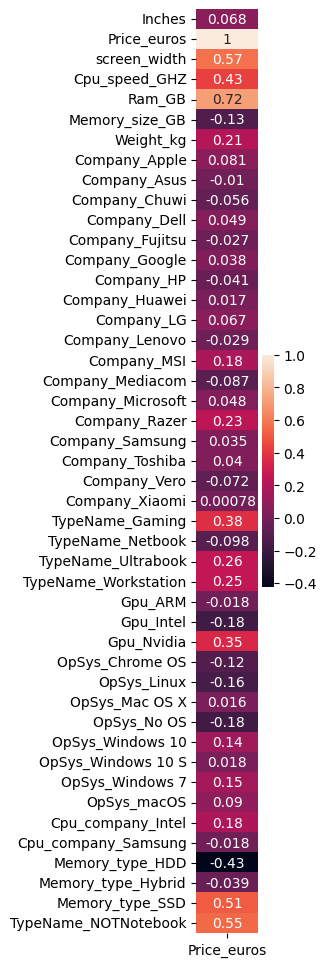

In [65]:
plt.figure(figsize=(1,12))
corr=data.corr()
sns.heatmap(data = corr.loc[:, ['Price_euros']],
            annot = True)


<AxesSubplot:>

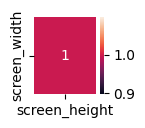

In [50]:
plt.figure(figsize=(1,1))
corr=data.corr()
sns.heatmap(data = corr.loc[['screen_width'], ['screen_height']],
            annot = True)

In [51]:
data.drop('screen_height',axis=1,inplace=True)


In [52]:
data['TypeName_Notebook'].value_counts()

1    727
0    576
Name: TypeName_Notebook, dtype: int64

In [58]:
data['TypeName_NOTNotebook']=data['TypeName_Notebook']^1
data.drop('TypeName_Notebook',axis=1,inplace=True)

In [59]:
data['TypeName_NOTNotebook'].value_counts()

0    727
1    576
Name: TypeName_NOTNotebook, dtype: int64

In [60]:
x=data.drop('Price_euros',axis=1)
y=data['Price_euros']

In [61]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1)

from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
train_x=sd.fit_transform(train_x)
test_x=sd.transform(test_x)

from sklearn.preprocessing import PolynomialFeatures
ply=PolynomialFeatures(degree=1)
train_X=ply.fit_transform(train_x)
test_X=ply.transform(test_x)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression()


from sklearn.metrics import mean_squared_error
y_pred_tr=model.predict(train_X)
print("MSE ON TRAIN :",np.sqrt(mean_squared_error(train_y,y_pred_tr)))
print("R2 ON TRAIN :",model.score(train_X,train_y))
y_pred_ts=model.predict(test_X)
print("MSE ON TEST :",np.sqrt(mean_squared_error(test_y,y_pred_ts)))
print("R2 ON TEST :",model.score(test_X,test_y))

In [62]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=30,min_samples_split=4,max_depth=6)
model.fit(train_x,train_y)

RandomForestRegressor(max_depth=6, min_samples_split=4, n_estimators=30)

In [63]:
RandomForestRegressor()


RandomForestRegressor()

In [64]:
from sklearn.metrics import mean_squared_error
y_pred_tr=model.predict(train_x)
print("MSE ON TRAIN :",np.sqrt(mean_squared_error(train_y,y_pred_tr)))
print("R2 ON TRAIN :",model.score(train_x,train_y))
y_pred_ts=model.predict(test_x)
print("MSE ON TEST :",np.sqrt(mean_squared_error(test_y,y_pred_ts)))
print("R2 ON TEST :",model.score(test_x,test_y))

MSE ON TRAIN : 265.4000746030696
R2 ON TRAIN : 0.8559822441160763
MSE ON TEST : 281.09495635340045
R2 ON TEST : 0.8338684208290017


from sklearn.linear_model import Lasso
model=Lasso(alpha=15)
model.fit(train_x,train_y)
y_pred=model.predict(test_x)


from sklearn.metrics import mean_squared_error
y_pred_tr=model.predict(train_x)
print("MSE ON TRAIN :",np.sqrt(mean_squared_error(train_y,y_pred_tr)))
print("R2 ON TRAIN :",model.score(train_x,train_y))
y_pred_ts=model.predict(test_x)
print("MSE ON TEST :",np.sqrt(mean_squared_error(test_y,y_pred_ts)))
print("R2 ON TEST :",model.score(test_x,test_y))